<a href="https://colab.research.google.com/github/lavanaythakral/GPT2-answers/blob/master/Semantic_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prerequisites

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from google.colab import drive
import scipy
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [26]:
filename = "/content/drive/My Drive/Thesis project/Thesis project/datasets/post BERT/responses_latest.csv"

In [27]:
df = pd.read_csv(filename)
df.head(5)

,Question,Answer
0,Why do we create Art?,The answer is simple: we create because we wa...
1,What is free will?,"What is intelligence?""I explained to him the p..."
2,What is freedom,This is beyond my knowledge but here's what I ...
3,What is truth?,there is a great deal that most of us can indi...
4,What is the soul?,Nandi


In [28]:
questions = list(df['Question'])
answers = list(df['Answer'])

In [29]:
len(questions)

41

In [9]:
answ1 = list(df['Answer'])
answers = []
for ans in answ1:
  answers.append(ans.replace("This is beyond my knowledge but here's what I think.",""))

In [10]:
df['Answer'] = answers

#Sentence Tranformers

In [11]:
!pip install -U sentence-transformers

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 1.1MB 12.4MB/s 
     |████████████████████████████████| 3.0MB 36.8MB/s 
     |████████████████████████████████| 890kB 55.5MB/s 
     |████████████████████████████████| 1.1MB 48.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.7.2-cp36-none-any.whl size=91190 sha256=86cff63e9dc52874800d6ada14e152dc11fab2a0146ffc2e091a702fc331e282
  Stored in directory: /root/.cache/pip/wheels/4b/8f/23/7f93e91176acc7c2d651b54fa9f01e3624a47904145c4d133e
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=e43f7b336e078d23eb0ea20fa381c18d80091491c70ce8b3ea4154accbba39c5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [12]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:23<00:00, 17.0MB/s]


In [13]:
#s1,s2 are strings
def calculate(s1,s2):
  e1 = model.encode([s1])
  e2 = model.encode([s2])
  distance = scipy.spatial.distance.cdist([e1[0]], [e2[0]], "cosine")[0]
  return distance[0]

In [14]:
def verification(questions,answers):
  scores = []
  for ques,ans in zip(questions,answers):
    scores.append(calculate(ques,ans))
  return scores

#Removing outliers

In [15]:
def set_range(questions,answers):
  v = verification(questions,answers)
  fig = plt.figure(figsize =(10, 7))  
  res = plt.boxplot(v) 
  min = (res['whiskers'][0].get_ydata()[0] + res['whiskers'][0].get_ydata()[1])/2
  max = (res['whiskers'][1].get_ydata()[1] + res['whiskers'][1].get_ydata()[0])/2
  print(min,max)
  plt.show() 
  return [min,max]

0.24914894699621126 0.7241658500267394


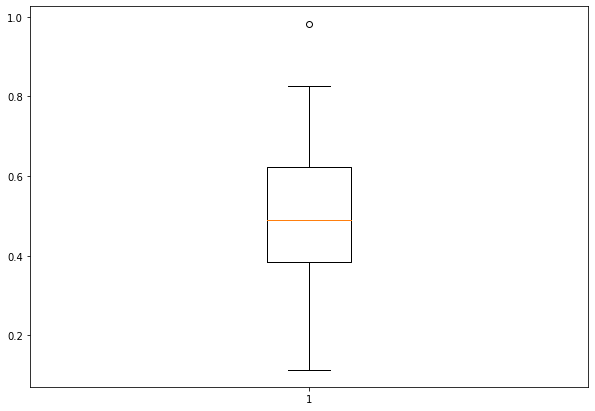

[0.24914894699621126, 0.7241658500267394]

In [16]:
set_range(questions,answers)

In [30]:
def refine(df):
  questions = list(df['Question'])
  answers = list(df['Answer'])
  scores = verification(questions,answers)
  df['scores'] = scores
  # min,max = set_range(questions,answers)
  rows = []
  min = .11
  max = .76
  print(min,max)
  predictions = {}
  for idx,(ques,ans,score) in enumerate(zip(questions,answers,scores)):
    if(score <= max and score >= min):
      dict1 = {}
      dict1['Question'] = ques
      dict1['Answer'] = ans
      predictions[str(idx)] = ans
      rows.append(dict1)
  return pd.DataFrame(rows),json.dumps(predictions,indent = 1)

In [31]:
df_range,predictions = refine(df)

0.11 0.76


In [33]:
df

,Question,Answer,scores
0,Why do we create Art?,The answer is simple: we create because we wa...,0.426580
1,What is free will?,"What is intelligence?""I explained to him the p...",0.490930
2,What is freedom,This is beyond my knowledge but here's what I ...,0.401219
3,What is truth?,there is a great deal that most of us can indi...,0.729095
4,What is the soul?,Nandi,0.500939
5,What do you fear most?,"I fear failure, deprivation, uncertainty",0.173011
6,Is there such a thing as luck,"If there is one thing outsiders dislike, it is...",0.510805
7,Are clowns funny or scary?,"They are neither, and they should never be ma...",0.756252
8,What are rights?,This is beyond my knowledge but here's what I ...,0.441959
9,What is mercy?,What is its origin?And what are the distincti...,0.382704


In [34]:
with open("/content/drive/My Drive/Thesis project/Thesis project/datasets/post BERT/pred_C_final.json","w") as f:
  f.write(predictions)